In [ ]:
# Import all the necessary file

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
train.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# from the above train data set found item weight and outlet size has null values

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
# from the above test data set found item weight and outlet size has null values

In [ ]:
train['source'] = 'train'
test['source']='test'

In [ ]:
train[:5]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [ ]:
test[:5]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test


In [ ]:
df = pd.concat([train, test])

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [ ]:
numerical_columns = df.select_dtypes(include = np.number).drop (columns =['Outlet_Establishment_Year', 'Item_Outlet_Sales'])
categorical_columns = df.select_dtypes(exclude=np.number).columns

In [ ]:
numerical_columns

,Item_Weight,Item_Visibility,Item_MRP
0,9.30,0.016047,249.8092
1,5.92,0.019278,48.2692
2,17.50,0.016760,141.6180
3,19.20,0.000000,182.0950
4,8.93,0.000000,53.8614
...,...,...,...
5676,10.50,0.013496,141.3154
5677,7.60,0.142991,169.1448
5678,10.00,0.073529,118.7440
5679,15.30,0.000000,214.6218


In [ ]:
categorical_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source'],
      dtype='object')

In [ ]:
#check for cardinality - uniqueness of data( can be identified by lambda fn.)

In [ ]:
df[categorical_columns].apply (lambda x:x.nunique())

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
source                     2
dtype: int64

In [ ]:
df[categorical_columns].apply (lambda x:print(x.value_counts()))

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Med

Item_Identifier         None
Item_Fat_Content        None
Item_Type               None
Outlet_Identifier       None
Outlet_Size             None
Outlet_Location_Type    None
Outlet_Type             None
source                  None
dtype: object

In [ ]:
df['Item_Identifier_3']= df['Item_Identifier'].apply (lambda x:x [0:3])
df['Item_Identifier_2']= df['Item_Identifier'].apply (lambda x:x [0:2])

In [ ]:
df['Item_Identifier_3'].value_counts()

FDT    467
FDX    460
FDW    460
FDV    454
FDU    452
      ... 
DRO     27
DRP     19
DRZ     18
DRQ      9
DRY      9
Name: Item_Identifier_3, Length: 71, dtype: int64

In [ ]:
df['Item_Identifier_2'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier_2, dtype: int64

list - use count
series na - value_counts

In [ ]:
df.groupby(by=['Item_Identifier_2', 'Item_Type']) ['Item_Identifier'].count()

Item_Identifier_2  Item_Type            
DR                 Dairy                     229
                   Hard Drinks               362
                   Soft Drinks               726
FD                 Baking Goods             1086
                   Breads                    416
                   Breakfast                 186
                   Canned                   1084
                   Dairy                     907
                   Frozen Foods             1426
                   Fruits and Vegetables    2013
                   Meat                      736
                   Seafood                    89
                   Snack Foods              1989
                   Starchy Foods             269
NC                 Health and Hygiene        858
                   Household                1548
                   Others                    280
Name: Item_Identifier, dtype: int64

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat' :'Low Fat', 'reg':'Regular'})

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [ ]:
df.groupby(['Outlet_Type', 'Outlet_Size'])['Item_Outlet_Sales'].mean()

Outlet_Type        Outlet_Size
Grocery Store      Small           340.329723
Supermarket Type1  High           2298.995256
                   Medium         2348.354635
                   Small          2358.343066
Supermarket Type2  Medium         1995.498739
Supermarket Type3  Medium         3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
numerical_columns

,Item_Weight,Item_Visibility,Item_MRP
0,9.30,0.016047,249.8092
1,5.92,0.019278,48.2692
2,17.50,0.016760,141.6180
3,19.20,0.000000,182.0950
4,8.93,0.000000,53.8614
...,...,...,...
5676,10.50,0.013496,141.3154
5677,7.60,0.142991,169.1448
5678,10.00,0.073529,118.7440
5679,15.30,0.000000,214.6218


In [ ]:
#in numerical columns Item_Weight has null values, and to eliminate this with the mean

In [ ]:
df.groupby(['Item_Identifier'])['Item_Weight'].mean()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [ ]:
df.groupby(['Item_Identifier_2'])['Item_Weight'].mean()

Item_Identifier_2
DR    12.116645
FD    12.735577
NC    13.344139
Name: Item_Weight, dtype: float64

In [ ]:
#since all the mean value fall between 12 and 13 replacing missing value with the mean

In [ ]:
df['Item_Weight']=df.groupby('Item_Type').Item_Weight.transform(lambda x:x.fillna(x.mean()))

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
Item_Identifier_3               0
Item_Identifier_2               0
dtype: int64

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Identifier_3,Item_Identifier_2
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,FDA,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,DRC,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,FDN,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,FDX,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,NCD,NC


In [ ]:
Train= df.loc[df['source']=='train']
Test=df.loc[df['source']=='test']

In [ ]:
Train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Identifier_3,Item_Identifier_2
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,FDA,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,DRC,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,FDN,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,FDX,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,NCD,NC


<ipython-input-64-bd6544b8e491>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=Train.corr()


<Axes: >

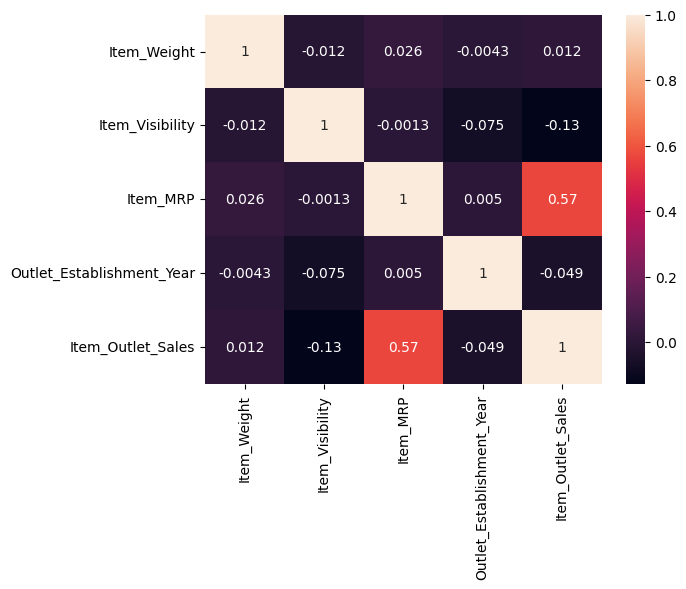

In [ ]:
 corr=Train.corr()
 sns.heatmap (corr, annot=True)

In [ ]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [ ]:
df['Outlet_age'] = 2013 - df['Outlet_Establishment_Year']

In [ ]:
df['Outlet_age'].value_counts()

28    2439
26    1553
14    1550
16    1550
9     1550
11    1548
4     1546
6     1543
15     925
Name: Outlet_age, dtype: int64

In [ ]:
df.drop(columns =['Outlet_Establishment_Year','Item_Identifier_3','Item_Identifier'],inplace = True )

In [ ]:
Train= df.loc[df['source']=='train']
Test=df.loc[df['source']=='test']

In [ ]:
Train.drop(columns='source', inplace=True)
Test.drop(columns='source', inplace=True)

<ipython-input-70-d8fbfd549817>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train.drop(columns='source', inplace=True)
<ipython-input-70-d8fbfd549817>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test.drop(columns='source', inplace=True)


In [ ]:
X= Train.select_dtypes(include = np.number).drop(columns = 'Item_Outlet_Sales')
vif_df = pd.DataFrame()
vif_df['features'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [ ]:
vif_df

,features,VIF
0,Item_Weight,5.596111
1,Item_Visibility,2.467378
2,Item_MRP,4.627731
3,Outlet_age,3.663044


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(handle_unknown ='ignore')

In [ ]:
enc.fit(Train[['Item_Identifier_2','Item_Fat_Content']])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
encoded_mat = enc.transform(Train[['Item_Identifier_2','Item_Fat_Content']])

In [ ]:
encoded_columns = enc.fit_transform(Train[['Item_Identifier_2','Item_Fat_Content']])

In [ ]:
enc.transform(Test[['Item_Identifier_2','Item_Fat_Content']]).toarray()

array([[0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       ...,
       [0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.]])

In [ ]:
df[['Item_Identifier_2','Item_Fat_Content']]

,Item_Identifier_2,Item_Fat_Content
0,FD,Low Fat
1,DR,Regular
2,FD,Low Fat
3,FD,Regular
4,NC,Low Fat
...,...,...
5676,FD,Regular
5677,FD,Regular
5678,NC,Low Fat
5679,FD,Regular


In [ ]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Identifier_2,Outlet_age
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,train,FD,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,train,DR,4
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,train,FD,14
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,train,FD,15
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,train,NC,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,Small,Tier 1,Supermarket Type1,NaN,test,FD,16
5677,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,Medium,Tier 3,Supermarket Type2,NaN,test,FD,4
5678,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,NaN,Tier 2,Supermarket Type1,NaN,test,NC,11
5679,15.30,Regular,0.000000,Canned,214.6218,OUT017,NaN,Tier 2,Supermarket Type1,NaN,test,FD,6


In [ ]:
encoded_columns.toarray()

array([[0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       ...,
       [0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [ ]:
numerical_columns = df.select_dtypes(include = np.number).drop(columns = ['Item_Outlet_Sales'])
categorical_columns = df.select_dtypes(exclude = np.number)df_categories_encoded = pd.get_dummies(categorical_columns)

In [ ]:
df_categories_encoded = pd.get_dummies(categorical_columns)

In [ ]:
df_categories_encoded

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,source_test,source_train,Item_Identifier_2_DR,Item_Identifier_2_FD,Item_Identifier_2_NC
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,0,1,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5677,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
5678,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
5679,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
df_final = pd.concat([numerical_columns,df_categories_encoded ,df['source']],axis = 1)

In [94]:
df_final.to_excel("Pre_processed_Data.xlsx",index = False)

In [95]:
from sklearn.linear_model import LinearRegression

In [97]:
from sklearn.metrics import mean_squared_error, r2_score

In [98]:
data_processed = pd.read_excel("Pre_processed_Data.xlsx")

In [99]:
data_processed

,Item_Weight,Item_Visibility,Item_MRP,Outlet_age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,source_test,source_train,Item_Identifier_2_DR,Item_Identifier_2_FD,Item_Identifier_2_NC,source
0,9.30,0.016047,249.8092,14,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,train
1,5.92,0.019278,48.2692,4,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,train
2,17.50,0.016760,141.6180,14,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,train
3,19.20,0.000000,182.0950,15,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,train
4,8.93,0.000000,53.8614,26,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,0.013496,141.3154,16,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,test
14200,7.60,0.142991,169.1448,4,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,test
14201,10.00,0.073529,118.7440,11,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,test
14202,15.30,0.000000,214.6218,6,0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,test


In [100]:
data_processed_train  = data_processed.loc[data_processed['source'] =='train']
data_processed_test  = data_processed.loc[data_processed['source'] =='test']


In [101]:
data_processed_train.drop(columns = ['source'],inplace = True)

<ipython-input-101-c270a30aca73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_processed_train.drop(columns = ['source'],inplace = True)


In [102]:
del data_processed_test['source']

In [103]:
train_orig = pd.read_csv('train.csv')

In [106]:
target = train_orig['Item_Outlet_Sales']

In [107]:
lr = LinearRegression()
lr.fit(data_processed_train,target)
predicted_train = lr.predict(data_processed_train)

In [108]:
predict_test = lr.predict(data_processed_test)

In [109]:
predict_test

array([1836.08695754, 1522.07111811, 1882.38514932, ..., 1823.90903332,
       3588.89689368, 1285.8407461 ])

In [112]:
predict_test =abs(predict_test)

In [113]:
submission = pd.read_csv("sample_submission_8RXa3c6.csv")

In [114]:
submission['Item_Outlet_Sales'] = predict_test

In [115]:
submission.to_csv("SubmissionLRBatch20.csv",index= False)

In [117]:
print("The Goodness of fit is: ",r2_score(target,predicted_train))

The Goodness of fit is:  0.563772677537701
